# 영상 필터링

필터링 연산  

마스크, 커널, 윈도우라 불리는 작은 행렬을 원본 이미지에 연산함  
커널은 일자형, 정사각형, 십자형 등이 있고 크기도 정할 수 있음  
커널의 정중앙 한 픽셀을 고정점(anchor)으로 하여 연산

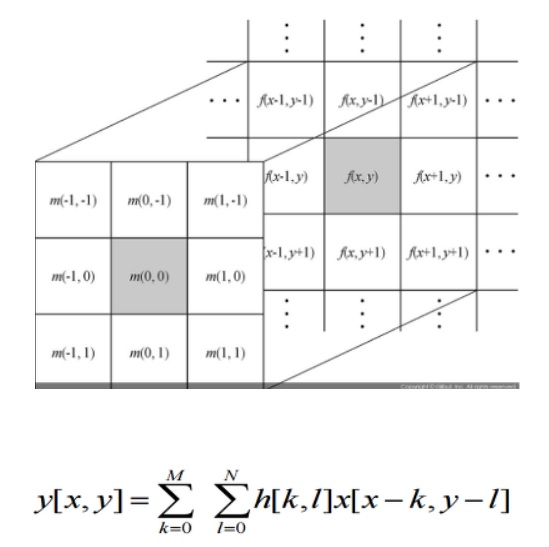
  
    
* 테두리 연산을 위해 상수 제공(boarder type)  
  BOARDER_CONSTANT: 000abcdef000  
  BOARDER_REPLICATE: aaaabcdeffff  
  BOARDER_REFLECT: cbaabcdeffed  
  BOARDER_REFLECT_101: dcbabcdefedc
  
  borderType = None 일 때 replicate가 기본
  
  
* 필터링 함수  
  cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None,   borderType=None) -> dst  
  src : 입력 영상  
  ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F,      cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.
  kernel: 필터 마스크 행렬. 실수형.  
  anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용  
  delta: 추가적으로 더할 값  
  borderType: 가장자리 픽셀 확장 방식  
  dst: 출력 영상   
  
  
* opencv 이미지 데이터 타입 종류  
CV_8U : 8-bit unsigned integer: uchar ( 0..255 )  
CV_8S : 8-bit signed integer: schar ( -128..127 )  
CV_16U : 16-bit unsigned integer: ushort ( 0..65535 )  
CV_16S : 16-bit signed integer: short ( -32768..32767 )  
CV_32S : 32-bit signed integer: int ( -2147483648..2147483647 )  
CV_32F : 32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )  
CV_64F : 64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )  

* 엠보싱 필터링  
이미지에 음영을 넣어 올록볼록하게 보이도록 하는 필터링  
  
kernel =   
[[-1, -1, 0],  
 [-1, 0, 1],  
 [0, 1, 1]]  

In [2]:
import cv2
import numpy as np

kernel = np.array([-1,-1,0,-1,0, 1, 0, 1, 1]).reshape(3,3)
img = cv2.imread('b.jpg', 0)
dst = cv2.filter2D(img, -1, kernel, None, (-1,-1), 128)
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 모션 블러 필터링  
카메라 좌우가 흔들린 효과를 만들어 줌  
  
kernel =   
1/size * [[0, 0, 0],  
          [1, 1, 1],  
          [0, 0, 0]] 

In [9]:
#커널 생성 예
size = 5
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :]=np.ones(size)
kernel/size

array([[0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [ ]:
kernel = np.array([[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0]])

In [12]:
size = 5
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :]=np.ones(size)
kernel = kernel/size

img = cv2.imread('a.jpg', 0)
dst = cv2.filter2D(img, -1, kernel)
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

<블러링>    
영상을 부드럽게 만드는 필터링. 여러 종류 있음 
  
* 평균값 필터  
주변 픽셀값의 평균값으로 필터링  

kernel =   
   1 / (3*3) * [[1, 1, 1],  
                 [1, 1, 1],  
                 [1, 1, 1]]

In [14]:
img = cv2.imread('b.jpg', 0)
k = 3   #커널 크기가 커질수록 뭉개짐이 심해짐
kernel = np.ones((k,k))/(k*k)
dst = cv2.filter2D(img, -1, kernel)
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 블러링 opencv 함수  
  
평균값 필터 함수: cv2.blur(img, kernelSize)  

In [15]:
img = cv2.imread('b.jpg', 0)
dst = cv2.blur(img, (3,3))
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 블러링 opencv 함수  

  
가우시안 필터링: 가우시안 분포 함수를 근사하여 생성한 커널로 필터링.  
평균값 필터보다 자연스럽게 처리함  
  
cv2.GaussianBlur(img, ksize, sigmaX)  
  ksize(w, h): 커널 크기  
  sigmaX: x방향 가우시안 커널 표준 편차

In [14]:
img = cv2.imread('b.jpg', 0)
cv2.imshow('img', img)

for i in range(1, 6):
    dst = cv2.GaussianBlur(img, (5,5), i)
    cv2.imshow('dst'+str(i), dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

<샤프닝>  
영상의 윤곽을 뚜렷하고 선명하게 하는 필터링.  
언샤프닝: 샤프닝을 위해서는 블러링된 영상 사용  
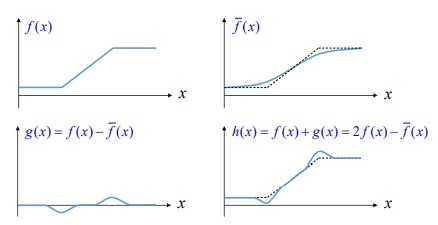  
  
첫 번째 그래프는 원본 이미지, 두 번째 그래프는 블러링한 이미지이다. 블러링으로 윤곽이 무뎌졌다. 이 부분의 차를 구한 것이 세번째 그래프이고 이 차를 확대해주면 경계선이 더욱 뚜렷해진다. 

* 흑백 이미지 언샤프닝

In [15]:
import cv2
import numpy as np

img = cv2.imread('c.jpg', 0)
cv2.imshow('img', img)

blr = cv2.GaussianBlur(img, (5,5), 5)
dst = np.clip(2.0*img - blr, 0, 255).astype('uint8')

cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

* 칼라 이미지 언샤프닝

In [16]:
import cv2
import numpy as np

img = cv2.imread('c.jpg')
cv2.imshow('img', img)

blr = cv2.GaussianBlur(img, (5,5), 5)
dst = np.clip(2.0*img - blr, 0, 255).astype('uint8')

cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

<잡음 제거 필터링>  
  
* 잡음 생성  
가우시안 난수 함수로 잡음 생성  
cv2.randn(난수담을 배열, 가우시안 분포 평균, 가우시안 분포 표준 편차) 

In [18]:

img = cv2.imread('c.jpg')

x = img.copy()  #노이즈 생성할 배열. 이미지와 동일 모양
x = x.astype('int8')  #부호있는 타입으로 변환
cv2.randn(x, 0, 0.3)   #가우시안 난수 생성하여 배열 x에 담음
x = x.astype('uint8')  #이미지 타입으로 변환
y = cv2.add(img, x)    #원본 이미지와 노이즈 합성

cv2.imshow('img', y)

cv2.waitKey(0)
cv2.destroyAllWindows()

* 잡음제거 opencv 함수  
  
앞에서 살펴본 가우시안블러 함수로 노이즈를 제거할 수 있지만 경계선도 흐릿해진다. 이를 보완해서 노이즈는 흐리게하고 경계선은 명확하게 하는 블러링 방법이 양방향 필터링이다  
  

cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType)  
src – image  
d – filtering시 고려할 주변 pixel 지름  
sigmaColor – 색 공간 표준편차.  
sigmaSpace – 좌표 공간 표준편차.  

In [29]:
dst = cv2.bilateralFilter(y, 9, 140, 20)
dst2 = cv2.GaussianBlur(y, (5,5), 2)
cv2.imshow('img', y)
cv2.imshow('img2', dst)
cv2.imshow('img3', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

잡음이 소금과 후추처럼 도드라진 점을 제거하는 것은 미디언 필더가 더 효과적이다. 이 필터는 커널의 값들을 정렬하여 중간값을 앵커로 지정한여 연산하는 필터링이다.  
  
cv2.medianBlur(img, ksize)  
  ksize: 커널크기

In [33]:
dst = cv2.medianBlur(y, 3)
cv2.imshow('img', y)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()